# Aprendizagem Automática Avançada

**Alunos:**
    João Raimundo (57454), Rui Roque (57588)

## Assigment #5 - Bayesian Learning

### 0.1. import libraries

In [1]:
from pomegranate import *
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
import numpy as np
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Problem 1

We started defining the condicional probabilitties for each node: A, B, C, D.

In [2]:
# Conditional probabilities distribution for each state

A = DiscreteDistribution({'T': 0.3, 'F': 0.7})

B = ConditionalProbabilityTable([
    ['F','T',0.4],
    ['F','F',0.6],
    ['T','T',0.8],
    ['T','F',0.4]], [A])

    
C = ConditionalProbabilityTable([
    ['F', 'F', 'T', 0.1],
    ['F', 'F', 'F', 0.9],
    ['F', 'T', 'T', 0.7],
    ['F', 'T', 'F', 0.3],
    ['T', 'F', 'T', 0.5],
    ['T', 'F', 'F', 0.5],
    ['T', 'T', 'T', 0.99],
    ['T', 'T', 'F', 0.01]], [A, B])

D = ConditionalProbabilityTable([
    ['F','T',0.55],
    ['F','F',0.45],
    ['T','T',0.2],
    ['T','F',0.8]], [B])


n1 = Node(A, name="A)")
n2 = Node(B, name="B")
n3 = Node(C, name="C")
n4 = Node(D, name="D")


Then, we create the Baysian Network by adding nodes and edges to the model 

In [3]:
# set model
model = BayesianNetwork("Bayesian Network")

# add nodes to the model
model.add_nodes(n1, n2, n3, n4)

# add edges to the model
model.add_edge(n1, n2)
model.add_edge(n1, n3)
model.add_edge(n2, n3)
model.add_edge(n2, n4)

# finish model
model.bake()

Calculating the probabilities for the following conditions.

We used the predict_proba method for this step. The nodes are defined by the same positions in the array structure: [A,B,C,D].

We only need to refer in the predict proba method the values that are conditioning a node, for the remaining nodes that are not conditioning, we set the value in the array to "None".

The output are dictionaries predicting the values for the nodes that we don't define before (= "None"), respecting the order of the nodes array [A,B,C,D].

#### a) P(A=T|C=T,D=T)

In [4]:
# P(A=T|C=T,D=T)
print(model.predict_proba([[None,None,'T','T']]))


[array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.5546193691694309,
                   "F" : 0.44538063083056906
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.4082082829874933,
                   "T" : 0.5917917170125067
               }
           ],
           "frozen" : false
       }                                    , 'T', 'T'], dtype=object)]


The first dictionary is referent to the node A, in the other hand the second dictionary display is referent to the node B.

As we are interested in to calc the probability of A being true conditioned by C=T and D=T, we choose the "T" value of the first dictionary: P(A=T|C=T,D=T) = 0.555

#### b) P(A=T|C=T,D=T)

In [5]:
# P(A=T|D=F)
print(model.predict_proba([[None,None,None,'F']]))

[array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.37329286798179073,
                   "F" : 0.6267071320182093
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.3687405159332322,
                   "T" : 0.6312594840667678
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.397848075324502,
                   "T" : 0.602151924675498
               }
           ],
  

As we are interested in to calc the probability of A being true conditioned by D=T, we choose the "T" value of the first dictionary: P(A=T|D=F) = 0.373

#### c) P(B=T|C=T)

In [6]:
# P(B=T|C=T)
print(model.predict_proba([[None,None,'T',None]]))

[array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "T" : 0.5500620381576264,
                   "F" : 0.44993796184237356
               }
           ],
           "frozen" : false
       }                                    ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.22146691521695522,
                   "T" : 0.7785330847830448
               }
           ],
           "frozen" : false
       }                                     , 'T',
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.7224865796740644,
                   "T" : 0.2775134203259356
               }
        

As we are interested in to calc the probability of B being true conditioned by C=T, we choose the "T" value of the second dictionary: P(B=T|C=T) = 0.779

#### d) P(B=T|A=T,C=T)

In [7]:
# P(B=T|A=T,C=T)
print(model.predict_proba([['T',None,'T',None]]))

[array(['T', {
                "class" : "Distribution",
                "dtype" : "str",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "F" : 0.20161290322580677,
                        "T" : 0.7983870967741933
                    }
                ],
                "frozen" : false
            }                                     , 'T',
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "F" : 0.7294354838709676,
                   "T" : 0.2705645161290325
               }
           ],
           "frozen" : false
       }                                    ], dtype=object)]


As we are interested in to calc the probability of B being true conditioned by A=T and C=T, we choose the "T" value of the first dictionary: P(B=T|A=T,C=T) = 0.798

#### e) P(C=T|A=F,B=F,D=F)

In [8]:
# P(C=T|A=F,B=F,D=F)
print(model.predict_proba([['F','F',None,'F']]))

[array(['F', 'F', {
                     "class" : "Distribution",
                     "dtype" : "str",
                     "name" : "DiscreteDistribution",
                     "parameters" : [
                         {
                             "F" : 0.8999999999999999,
                             "T" : 0.10000000000000016
                         }
                     ],
                     "frozen" : false
                 }                                    , 'F'], dtype=object)]


As we are interested in to calc the probability of C being true conditioned by A=F, B=F and D=F, we choose the "T" value of dictionary: P(C=T|A=F,B=F,D=F) = 0.10

# Problem 2

 ## 1 - Pre-processment of Iris dataset for NB classification model

Since CategoricalNB classification model works with categorical data, we will load the iris dataset and discretize into Small, Medium and Large categories. Further, we create the dummies for each discretized featured, ending with a binary matrix set of results.

In [9]:
# load dataset
data=load_iris()
cnames=data.feature_names
X0=data.data
class_names=data.target_names
y_iris=data.target_names[data.target]

# Discretization: small, medium, large
X_iris=np.empty(X0.shape,dtype="object")
X_iris[:,:]="Medium"
for i,cname in enumerate(cnames):
    q33, q67=np.quantile(X0[:,i], (0.33, 0.67))
    X_iris[X0[:,i]<q33, i]="Small"
    X_iris[X0[:,i]>q67, i]="Large"

In [10]:
iris = pd.DataFrame(X_iris, columns=cnames)
iris = pd.get_dummies(iris, columns = cnames)
col_names=np.array(iris.columns)

X_iris = iris.values
X_iris

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

### 1.1 - NB Model Classification

In [39]:
# config plot
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\raimu\AppData\Local\Temp/ipykernel_10796/497376691.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [40]:
# split train test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=22)

Training the NB Model with different values for the alpha hyperparameter [1-50], calculating the accuracy for our predictions in each alpha iteration using cross_val_score().

In [41]:
scores = []
alphas = np.arange(1,50,1)
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=22)

for alpha in alphas:
    model = CategoricalNB(alpha=alpha)
    acc = cross_val_score(model, X_train, y_train, cv = cv)
    score = {"Model": 'CategoricalNB','HParameters':'alpha','HParameters_value':alpha,
            'Accuracy': acc.mean()
            }
    
    scores.append(score)

df = pd.DataFrame(scores)
df

,Model,HParameters,HParameters_value,Accuracy
0,CategoricalNB,alpha,1,0.930435
1,CategoricalNB,alpha,2,0.930435
2,CategoricalNB,alpha,3,0.930435
3,CategoricalNB,alpha,4,0.930435
4,CategoricalNB,alpha,5,0.930435
5,CategoricalNB,alpha,6,0.930435
6,CategoricalNB,alpha,7,0.930435
7,CategoricalNB,alpha,8,0.934783
8,CategoricalNB,alpha,9,0.934783
9,CategoricalNB,alpha,10,0.934783


In [42]:
# selecting the model which obtained the best accuracy
df.loc[df['Accuracy'] == df['Accuracy'].max()]

,Model,HParameters,HParameters_value,Accuracy
29,CategoricalNB,alpha,30,0.943478
30,CategoricalNB,alpha,31,0.943478
31,CategoricalNB,alpha,32,0.943478
32,CategoricalNB,alpha,33,0.943478
33,CategoricalNB,alpha,34,0.943478
34,CategoricalNB,alpha,35,0.943478
35,CategoricalNB,alpha,36,0.943478
36,CategoricalNB,alpha,37,0.943478
37,CategoricalNB,alpha,38,0.943478
38,CategoricalNB,alpha,39,0.943478


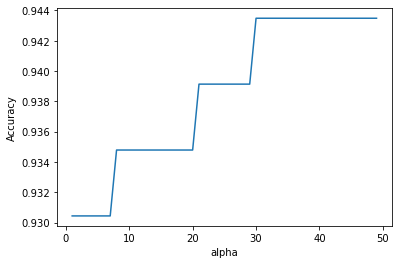

In [14]:
# alpha values vs obtained accuracies
plt.plot(df["HParameters_value"], df['Accuracy'])
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.show()

Due the plot apresented above, we choose alpha=30 as hyperparameter of the validated model.
Next, we test the validated model.

In [15]:
model = CategoricalNB(alpha=30)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))
print("Accuracy: ", accuracy_score(preds, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.81      0.90        16
   virginica       0.79      1.00      0.88        11

    accuracy                           0.92        38
   macro avg       0.93      0.94      0.93        38
weighted avg       0.94      0.92      0.92        38

Accuracy:  0.9210526315789473


## 2 - RandomForest Classifier

In [16]:
# load iris dataset
X, y = load_iris( return_X_y = True)

In [17]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Definition of a function that uses the gridSearch to train the model with different hyperparameters, in order to find the best of them.

In [18]:
def bestParams(X, y, param_grid, cv):
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv).fit(X, y)

    results = pd.DataFrame(clf.cv_results_)
    #results = results.drop(columns=["mean_fit_time", "std_fit_time", "mean_score_time", "std_score_time", "split0_test_score", "split1_test_score", "split2_test_score", "split3_test_score", "split4_test_score", "std_test_score", "rank_test_score"])
    results = results.iloc[:, [4,5,6,7,-3]]
    return results

In [19]:
# hyperparameters to test
params = [[{'n_estimators': [100, 1000, 1000], 
            'criterion': ['gini', "entropy"],
            'min_samples_leaf': [1, 2, 3, 4, 5]}], 
          [{'n_estimators': [100, 1000, 1000], 
            'criterion': ['gini', "entropy"],
            'max_depth': [None, 2, 3, 4, 5]}], 
          [{'n_estimators': [100, 1000, 1000], 
            'criterion': ['gini', "entropy"],
            'min_samples_split': [2,3,4,5,6]}], 
          [{'n_estimators': [100, 1000, 1000], 
            'criterion': ['gini', "entropy"],
            'max_leaf_nodes': [None, 2, 3, 4, 5]}], 
          [{'n_estimators': [100, 1000, 1000], 
            'criterion': ['gini', "entropy"],
            'bootstrap': [True, False]}]]


# definitions of the spliting
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=22)

# loop through the params array and call the bestParams function 
i = 1
for param in params:
  if(i == 1):
    results = bestParams(X_train, y_train, param, cv)
    #table with the models that have the highest accurancy for the given parameters
    results_max = results.loc[results['mean_test_score'] == results['mean_test_score'].max()]
  elif(i == 2):
    results2 = bestParams(X_train, y_train, param, cv)
    #table with the models that have the highest accurancy for the given parameters
    results2_max = results2.loc[results2['mean_test_score'] == results2['mean_test_score'].max()]
  elif(i == 3):
    results3 = bestParams(X_train, y_train, param, cv)
    #table with the models that have the highest accurancy for the given parameters
    results3_max = results3.loc[results3['mean_test_score'] == results3['mean_test_score'].max()]
  elif(i == 4):
    results4 = bestParams(X_train, y_train, param, cv)
    #table with the models that have the highest accurancy for the given parameters
    results4_max = results4.loc[results4['mean_test_score'] == results4['mean_test_score'].max()]
  elif(i == 5):
    results5 = bestParams(X_train, y_train, param, cv)
    #table with the models that have the highest accurancy for the given parameters
    results5_max = results5.loc[results5['mean_test_score'] == results5['mean_test_score'].max()]
  i += 1


Each result, obtained above, used a different set of parameters described in the array ("params").

Inspecting each results table:

In [43]:
results

,param_criterion,param_min_samples_leaf,param_n_estimators,params,mean_test_score
0,gini,1,100,"{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 100}",0.934783
1,gini,1,1000,"{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 1000}",0.926087
2,gini,1,1000,"{'criterion': 'gini', 'min_samples_leaf': 1, 'n_estimators': 1000}",0.926087
3,gini,2,100,"{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 100}",0.934783
4,gini,2,1000,"{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 1000}",0.926087
5,gini,2,1000,"{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 1000}",0.926087
6,gini,3,100,"{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 100}",0.939130
7,gini,3,1000,"{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 1000}",0.926087
8,gini,3,1000,"{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 1000}",0.926087
9,gini,4,100,"{'criterion': 'gini', 'min_samples_leaf': 4, 'n_estimators': 100}",0.930435


In [44]:
results2

,param_criterion,param_max_depth,param_n_estimators,params,mean_test_score
0,gini,None,100,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}",0.934783
1,gini,None,1000,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 1000}",0.926087
2,gini,None,1000,"{'criterion': 'gini', 'max_depth': None, 'n_estimators': 1000}",0.926087
3,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}",0.904348
4,gini,2,1000,"{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000}",0.908696
5,gini,2,1000,"{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000}",0.908696
6,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 100}",0.930435
7,gini,3,1000,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 1000}",0.926087
8,gini,3,1000,"{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 1000}",0.926087
9,gini,4,100,"{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100}",0.934783


In [45]:
results3

,param_criterion,param_min_samples_split,param_n_estimators,params,mean_test_score
0,gini,2,100,"{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 100}",0.934783
1,gini,2,1000,"{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 1000}",0.926087
2,gini,2,1000,"{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 1000}",0.926087
3,gini,3,100,"{'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 100}",0.939130
4,gini,3,1000,"{'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 1000}",0.934783
5,gini,3,1000,"{'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 1000}",0.934783
6,gini,4,100,"{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 100}",0.939130
7,gini,4,1000,"{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 1000}",0.930435
8,gini,4,1000,"{'criterion': 'gini', 'min_samples_split': 4, 'n_estimators': 1000}",0.930435
9,gini,5,100,"{'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 100}",0.939130


In [46]:
results4

,param_criterion,param_max_leaf_nodes,param_n_estimators,params,mean_test_score
0,gini,None,100,"{'criterion': 'gini', 'max_leaf_nodes': None, 'n_estimators': 100}",0.934783
1,gini,None,1000,"{'criterion': 'gini', 'max_leaf_nodes': None, 'n_estimators': 1000}",0.926087
2,gini,None,1000,"{'criterion': 'gini', 'max_leaf_nodes': None, 'n_estimators': 1000}",0.926087
3,gini,2,100,"{'criterion': 'gini', 'max_leaf_nodes': 2, 'n_estimators': 100}",0.800000
4,gini,2,1000,"{'criterion': 'gini', 'max_leaf_nodes': 2, 'n_estimators': 1000}",0.826087
5,gini,2,1000,"{'criterion': 'gini', 'max_leaf_nodes': 2, 'n_estimators': 1000}",0.826087
6,gini,3,100,"{'criterion': 'gini', 'max_leaf_nodes': 3, 'n_estimators': 100}",0.908696
7,gini,3,1000,"{'criterion': 'gini', 'max_leaf_nodes': 3, 'n_estimators': 1000}",0.900000
8,gini,3,1000,"{'criterion': 'gini', 'max_leaf_nodes': 3, 'n_estimators': 1000}",0.900000
9,gini,4,100,"{'criterion': 'gini', 'max_leaf_nodes': 4, 'n_estimators': 100}",0.930435


In [47]:
results5

,param_bootstrap,param_criterion,param_n_estimators,params,mean_test_score
0,True,gini,100,"{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}",0.934783
1,True,gini,1000,"{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}",0.926087
2,True,gini,1000,"{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 1000}",0.926087
3,True,entropy,100,"{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}",0.934783
4,True,entropy,1000,"{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 1000}",0.926087
5,True,entropy,1000,"{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 1000}",0.926087
6,False,gini,100,"{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}",0.913043
7,False,gini,1000,"{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 1000}",0.913043
8,False,gini,1000,"{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 1000}",0.913043
9,False,entropy,100,"{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}",0.921739


For each results table we selected the model with the best mean_test_score. Here we concatenate all this filtered tables, in order to only have a table with all the best models from all the result tables.
After this step, we select the model with the maximum mean_test_score.

In [48]:
results_max_filt = results_max[["params", "mean_test_score"]]
results2_max_filt = results2_max[["params", "mean_test_score"]]
results3_max_filt = results3_max[["params", "mean_test_score"]]
results4_max_filt = results4_max[["params", "mean_test_score"]]
results5_max_filt = results5_max[["params", "mean_test_score"]]

# concatenation
finalResults = pd.concat([results_max_filt, results2_max_filt, results3_max_filt, results4_max_filt, results5_max_filt ]).reset_index(drop = True)
finalResults

,params,mean_test_score
0,"{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 100}",0.939130
1,"{'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 100}",0.939130
2,"{'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 100}",0.939130
3,"{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}",0.939130
4,"{'criterion': 'entropy', 'min_samples_split': 3, 'n_estimators': 100}",0.943478
5,"{'criterion': 'entropy', 'min_samples_split': 4, 'n_estimators': 100}",0.943478
6,"{'criterion': 'entropy', 'max_leaf_nodes': 5, 'n_estimators': 100}",0.943478
7,"{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}",0.934783
8,"{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}",0.934783


In [51]:
# maximum mean_test_score from final results table
finalResults_max = finalResults.loc[finalResults['mean_test_score'] == finalResults['mean_test_score'].max()]
finalResults_max

,params,mean_test_score
6,"{'criterion': 'entropy', 'max_leaf_nodes': 5, 'n_estimators': 100}",0.943478


The best parameters validated with the RandomForest Classifier Model are: {'criterion': 'entropy', 'max_leaf_nodes': 5, 'n_estimators': 100}. Supported with a mean_test_score of 0.943.

Next, we proceed to train the model with this hyperparameters, and make the predictions with the test set.

In [79]:
model = RandomForestClassifier(criterion="entropy", max_leaf_nodes=5, n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))
print("Accuracy: ", accuracy_score(preds, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Accuracy:  1.0


<br>

## 3. Final Remarks

The best selected hyperparameters were:

<br>  

 * NB Classifier: alpha = 30
    - supported with an accuracy of 0.921

<br>    

 * RandomForest Classifier: criterion = entropy, max_leaf_nodes = 5, n_estimators = 100}	
    - supported with an accuracy of 1.0

<br>  

These means that RandomForest Classifier was more accurate in the predictions that made. This highter scores were influenced by the Iris Dataset, that shows optimal results.